In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
colors = ['#651FFF', '#00B0FF', '#1DE9B6', '#00E676', '#FF9100', '#FF3D00']
sns.set_palette(colors)
plt.rcParams['figure.figsize'] = (8, 8)

### Aboout the Data
These are results from the 2014 boston marathon and will be used to test some different clustering methods. So we'll load the data then take a look at our data types and if we have any columns with an unusual amount of null objects.

In [2]:
results = pd.read_csv('2014_results.csv')

results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


Drop the ctz column, as it is mostly null values.

In [3]:
results = results.drop(['ctz'], axis=1)

The null values for 'State' are because of runners outside of the US and Canada, so I'll fill them with 'Inter' to signify that they're international.

In [4]:
results['state'] = results['state'].fillna(value='inter')

In [5]:
results.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,8,3.27,inter,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,116.37,21,5.30,inter,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,67.42,1,3.08,inter,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,116.37,27,5.37,inter,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,2,3.10,inter,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [6]:
# With the bib W, it means that you're a wheelchair racer. I am assuming that because these times are way lower, 
# we may have to drop them.

results.loc[results['bib'].str.contains('W')].describe()

,division,age,official,genderdiv,overall,pace
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,16.075472,34.641509,106.713585,18.283019,27.000000,4.078491
std,11.899982,10.103492,26.176701,12.690665,15.443445,0.999108
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,6.000000,27.000000,89.400000,7.000000,14.000000,3.420000
50%,13.000000,33.000000,98.550000,16.000000,27.000000,3.770000
75%,26.000000,43.000000,109.000000,29.000000,40.000000,4.170000
max,39.000000,59.000000,191.330000,42.000000,53.000000,7.300000


In [7]:
results = results.drop(results[results['bib'].str.contains('W')].index)

In [8]:
results['division'].value_counts()

1       20
2       19
4       19
3       19
6       18
8       18
7       18
5       18
10      17
14      17
17      17
15      17
11      17
20      17
12      17
9       17
13      17
19      17
16      17
18      17
22      16
38      16
39      16
23      16
33      16
29      16
31      16
40      16
36      16
35      16
        ..
6541     1
6032     1
6810     1
6683     1
6842     1
6460     1
6794     1
5924     1
6778     1
6111     1
6016     1
6476     1
6095     1
6635     1
6890     1
6508     1
6922     1
6079     1
6129     1
6906     1
6080     1
6651     1
6667     1
6492     1
6062     1
6874     1
6064     1
6788     1
6858     1
6829     1
Name: division, Length: 6979, dtype: int64

In [9]:
results.loc[results['division']==1]

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,116.37,21,5.30,inter,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
39,30.48,"Keflezighi, Meb",1,76.00,M,38,128.62,19,1,106.62,1,4.92,CA,91.17,15.15,64.35,61.08,USA,San Diego,121.82
114,32.63,"Steidl, Ulrich",1,82.20,M,42,139.80,77,22,116.10,23,5.33,WA,99.15,16.25,69.18,65.52,USA,Seattle,132.47
115,32.63,"Lokken, Tracy",1,83.90,M,48,144.65,79,40,119.20,51,5.53,MI,101.33,16.23,70.32,66.53,USA,Marquette,136.83
125,36.48,"Simon, Lidia",1,92.30,F,40,156.78,F102,24,130.75,222,5.98,CO,111.57,18.20,77.57,73.50,USA,Boulder,148.90
149,37.82,"Bentley, Lisa",1,96.92,F,45,167.78,F112,41,138.27,759,6.40,FL,117.17,18.50,81.62,77.30,USA,Clermont,159.02
390,35.98,"Bennett, Mark",1,90.75,M,53,154.68,390,149,128.33,170,5.90,BC,109.57,17.98,76.48,72.53,CAN,Vancouver,146.55
575,36.02,"Tighe, Martin B",1,93.40,M,56,161.63,601,375,133.08,403,6.17,RI,113.15,17.93,78.13,73.95,USA,Providence,152.60
917,39.08,"Samuelson, Joan B.",1,99.98,F,56,172.17,983,58,141.93,1149,6.57,ME,120.93,19.37,83.98,79.50,USA,Freeport,162.68
2497,39.73,"Loken, Susan",1,100.40,F,50,175.03,2848,83,143.75,1496,6.68,AZ,121.92,19.95,84.25,79.82,USA,Phoenix,165.17


In [10]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31931 entries, 1 to 31983
Data columns (total 20 columns):
10k          31931 non-null object
name         31931 non-null object
division     31931 non-null int64
25k          31931 non-null object
gender       31931 non-null object
age          31931 non-null int64
official     31931 non-null float64
bib          31931 non-null object
genderdiv    31931 non-null int64
35k          31931 non-null object
overall      31931 non-null int64
pace         31931 non-null float64
state        31931 non-null object
30k          31931 non-null object
5k           31931 non-null object
half         31931 non-null object
20k          31931 non-null object
country      31931 non-null object
city         31930 non-null object
40k          31931 non-null object
dtypes: float64(2), int64(4), object(14)
memory usage: 5.1+ MB


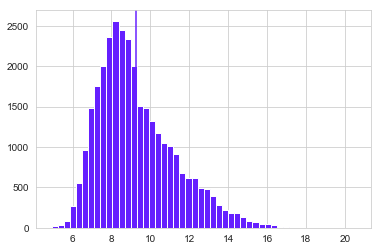

In [11]:
plt.hist(results['pace'], bins=50)
plt.axvline(x=results['pace'].mean())
plt.show()

In [12]:
results.describe()

,division,age,official,genderdiv,overall,pace
count,31931.000000,31931.000000,31931.000000,31931.000000,31931.000000,31931.000000
mean,1935.744073,42.419968,243.223522,8064.377752,15966.000000,9.284285
std,1714.871975,11.314113,52.037284,4746.662139,9217.830059,1.982437
min,1.000000,18.000000,128.620000,1.000000,1.000000,4.920000
25%,614.000000,34.000000,205.680000,3992.000000,7983.500000,7.850000
50%,1428.000000,42.000000,232.430000,7983.000000,15966.000000,8.870000
75%,2614.000000,50.000000,273.325000,11974.500000,23948.500000,10.430000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


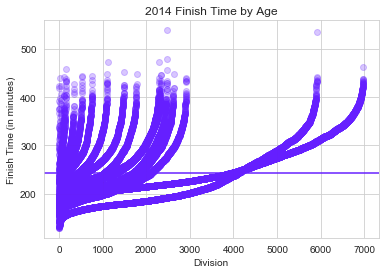

In [13]:
plt.scatter(x=results['division'], y=results['official'], alpha=.25)
plt.axhline(y=results['official'].mean())
plt.title('2014 Finish Time by Age') 
plt.xlabel('Division')
plt.ylabel('Finish Time (in minutes)');

In [14]:
to_number = ['5k','10k','20k', '25k', 'half', '30k','35k', '40k']

def to_numeric(columns):
    for column in columns:
        results[column] = pd.to_numeric(results[column], errors='coerce')
        
to_numeric(to_number)

In [15]:
results.dtypes

10k          float64
name          object
division       int64
25k          float64
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
35k          float64
overall        int64
pace         float64
state         object
30k          float64
5k           float64
half         float64
20k          float64
country       object
city          object
40k          float64
dtype: object

### Get the Countries
Pulled countries, their regions and their respective codes from https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv. Will merge this with the results table.

In [16]:
results.country.value_counts()

USA    27204
CAN     2170
GBR      345
ITA      212
MEX      205
GER      182
JPN      171
AUS      124
IRL      119
FRA      114
BRA       87
ESP       85
SWE       66
SUI       60
KOR       60
NED       54
HKG       53
DEN       50
COL       40
CHN       39
CHI       29
FIN       28
ISL       28
BEL       27
SIN       23
AUT       22
NOR       21
VEN       19
TPE       18
RSA       18
       ...  
CZE        4
SVK        4
TUR        4
MAS        4
LUX        4
PAN        3
DOM        3
ECU        3
HUN        3
UKR        3
EGY        2
ESA        2
QAT        2
BAH        2
ROU        2
BLR        1
CRO        1
VGB        1
ZIM        1
LIE        1
URU        1
MAR        1
EST        1
INA        1
BOL        1
BAR        1
TAN        1
CAY        1
BRN        1
TRI        1
Name: country, Length: 77, dtype: int64

In [17]:
# load the database with countrie
countries = pd.read_csv('countries.csv')

# pick out the columns we want to merge
merge = ['alpha-3', 'country-code', 'region', 'sub-region', 'region-code', 'sub-region-code'] 

# take a view at the data
countries.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [18]:
#columns and values
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
name                        249 non-null object
alpha-2                     248 non-null object
alpha-3                     249 non-null object
country-code                249 non-null int64
iso_3166-2                  249 non-null object
region                      248 non-null object
sub-region                  248 non-null object
intermediate-region         107 non-null object
region-code                 248 non-null float64
sub-region-code             248 non-null float64
intermediate-region-code    107 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 21.5+ KB


In [19]:
# select only the columns to merge
country_m = countries[merge]

# rename the country code column to be country / to merge on
country_m = country_m.rename({'alpha-3':'country'}, axis='columns')

# meeerrrgeeee
results = results.merge(country_m, on='country')

results.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,...,half,20k,country,city,40k,country-code,region,sub-region,region-code,sub-region-code
0,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,116.37,...,69.47,65.83,KEN,Eldoret,132.10,404,Africa,Sub-Saharan Africa,2.0,202.0
1,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,116.37,...,69.47,65.83,KEN,Nandi,132.95,404,Africa,Sub-Saharan Africa,2.0,202.0
2,32.58,"Cherop, Sharon",8,82.45,F,30,143.00,F6,8,116.92,...,69.47,65.85,KEN,Marakwet,134.65,404,Africa,Sub-Saharan Africa,2.0,202.0
3,30.52,"Chebet, Wilson",2,76.97,M,28,128.80,7,2,107.47,...,64.87,61.63,KEN,Marakwet,121.95,404,Africa,Sub-Saharan Africa,2.0,202.0
4,32.58,"Kilel, Caroline",17,85.55,F,33,152.07,F7,17,124.22,...,71.10,67.15,KEN,Bomet,143.50,404,Africa,Sub-Saharan Africa,2.0,202.0


In [20]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31385 entries, 0 to 31384
Data columns (total 25 columns):
10k                31336 non-null float64
name               31385 non-null object
division           31385 non-null int64
25k                31171 non-null float64
gender             31385 non-null object
age                31385 non-null int64
official           31385 non-null float64
bib                31385 non-null object
genderdiv          31385 non-null int64
35k                31352 non-null float64
overall            31385 non-null int64
pace               31385 non-null float64
state              31385 non-null object
30k                31346 non-null float64
5k                 31333 non-null float64
half               31314 non-null float64
20k                31334 non-null float64
country            31385 non-null object
city               31384 non-null object
40k                31347 non-null float64
country-code       31385 non-null int64
region             31385 

As we knew before most of the runners in the race were from North America. Interesting to see how the rest breaks down based upon region though.

In [21]:
results['sub-region'].value_counts()

Northern America                   29374
Northern Europe                      608
Latin America and the Caribbean      384
Eastern Asia                         323
Southern Europe                      297
Western Europe                       168
Australia and New Zealand            141
Eastern Europe                        49
Sub-Saharan Africa                    18
Western Asia                          13
Southern Asia                          6
Northern Africa                        3
South-eastern Asia                     1
Name: sub-region, dtype: int64

In [22]:
results['city'].value_counts()

Boston                1033
New York               498
Chicago                312
Cambridge              311
Somerville             240
Toronto                239
Brookline              222
Washington             212
Newton                 201
Austin                 192
San Francisco          192
Portland               191
Arlington              184
San Diego              182
Brighton               151
Seattle                149
Charlestown            148
Houston                138
London                 135
Quincy                 134
Medford                132
Brooklyn               131
Ottawa                 130
South Boston           130
Atlanta                122
Denver                 118
Dorchester             117
Calgary                108
Cincinnati             106
Wellesley              105
                      ... 
Blackfoot                1
Herts                    1
Foster City              1
Fort Gratiot             1
Planville                1
Stewartsville            1
M

___

#### Gender to Codes

In [23]:
results.gender.value_counts()

M    17151
F    14234
Name: gender, dtype: int64

In [24]:
results['gender'] = results['gender'].astype('category')

results['gender_code'] = results['gender'].cat.codes

___

In [25]:
results.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,...,20k,country,city,40k,country-code,region,sub-region,region-code,sub-region-code,gender_code
0,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,116.37,...,65.83,KEN,Eldoret,132.10,404,Africa,Sub-Saharan Africa,2.0,202.0,0
1,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,116.37,...,65.83,KEN,Nandi,132.95,404,Africa,Sub-Saharan Africa,2.0,202.0,0
2,32.58,"Cherop, Sharon",8,82.45,F,30,143.00,F6,8,116.92,...,65.85,KEN,Marakwet,134.65,404,Africa,Sub-Saharan Africa,2.0,202.0,0
3,30.52,"Chebet, Wilson",2,76.97,M,28,128.80,7,2,107.47,...,61.63,KEN,Marakwet,121.95,404,Africa,Sub-Saharan Africa,2.0,202.0,1
4,32.58,"Kilel, Caroline",17,85.55,F,33,152.07,F7,17,124.22,...,67.15,KEN,Bomet,143.50,404,Africa,Sub-Saharan Africa,2.0,202.0,0


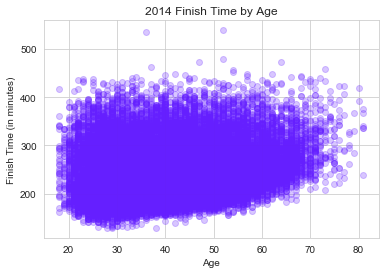

In [26]:
plt.scatter(x = results['age'], y = results['official'], alpha=.25)
plt.title('2014 Finish Time by Age') 
plt.xlabel('Age')
plt.ylabel('Finish Time (in minutes)');

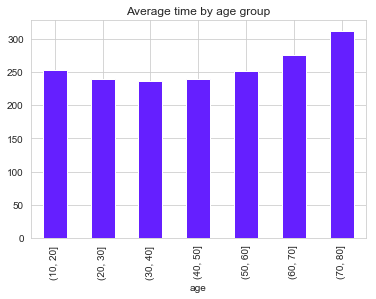

In [27]:
results['official'].groupby(pd.cut(results['age'], range(10,90,10))).aggregate(np.average).plot(kind="bar", title="Average time by age group")
plt.show()

In [28]:
results.age.max()

81

In [29]:
results['age-bracket'] = pd.cut(results['age'], range(10,90,10))
results['age-bracket'] = results['age-bracket'].astype('category')
results['age-bracket_code'] = results['age-bracket'].cat.codes

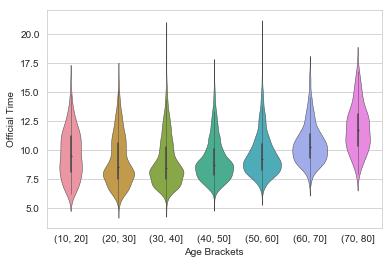

In [30]:
sns.violinplot(x='age-bracket', y='pace', data=results, linewidth=.5)
plt.xlabel('Age Brackets')
plt.ylabel('Official Time')
plt.show()

In [31]:
results['age-bracket'].value_counts()

(40, 50]    9915
(30, 40]    8142
(50, 60]    5728
(20, 30]    5517
(60, 70]    1723
(10, 20]     181
(70, 80]     173
Name: age-bracket, dtype: int64

___

In [32]:
results.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,...,city,40k,country-code,region,sub-region,region-code,sub-region-code,gender_code,age-bracket,age-bracket_code
0,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,116.37,...,Eldoret,132.10,404,Africa,Sub-Saharan Africa,2.0,202.0,0,"(30, 40]",2
1,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,116.37,...,Nandi,132.95,404,Africa,Sub-Saharan Africa,2.0,202.0,0,"(20, 30]",1
2,32.58,"Cherop, Sharon",8,82.45,F,30,143.00,F6,8,116.92,...,Marakwet,134.65,404,Africa,Sub-Saharan Africa,2.0,202.0,0,"(20, 30]",1
3,30.52,"Chebet, Wilson",2,76.97,M,28,128.80,7,2,107.47,...,Marakwet,121.95,404,Africa,Sub-Saharan Africa,2.0,202.0,1,"(20, 30]",1
4,32.58,"Kilel, Caroline",17,85.55,F,33,152.07,F7,17,124.22,...,Bomet,143.50,404,Africa,Sub-Saharan Africa,2.0,202.0,0,"(30, 40]",2


In [33]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31385 entries, 0 to 31384
Data columns (total 28 columns):
10k                 31336 non-null float64
name                31385 non-null object
division            31385 non-null int64
25k                 31171 non-null float64
gender              31385 non-null category
age                 31385 non-null int64
official            31385 non-null float64
bib                 31385 non-null object
genderdiv           31385 non-null int64
35k                 31352 non-null float64
overall             31385 non-null int64
pace                31385 non-null float64
state               31385 non-null object
30k                 31346 non-null float64
5k                  31333 non-null float64
half                31314 non-null float64
20k                 31334 non-null float64
country             31385 non-null object
city                31384 non-null object
40k                 31347 non-null float64
country-code        31385 non-null int64
re

In [34]:
results['state'].value_counts()

MA       7584
CA       2326
inter    2011
NY       1553
ON       1050
PA       1001
TX        992
IL        900
OH        760
FL        748
VA        713
MI        695
NC        618
WA        596
CO        577
NJ        569
MN        556
MD        527
NH        525
CT        521
GA        442
WI        433
UT        430
QC        417
OR        405
AZ        316
IN        291
TN        261
MO        256
ME        250
         ... 
ID        124
NE        111
NS        109
AL        105
OK         92
NV         88
LA         78
NM         71
MT         65
DE         63
WV         56
NB         55
AK         50
HI         49
AR         48
MB         47
MS         46
SK         32
SD         32
ND         31
PE         23
WY         22
NL         18
PR         17
AE          7
YT          5
NT          3
GU          1
AP          1
AA          1
Name: state, Length: 69, dtype: int64

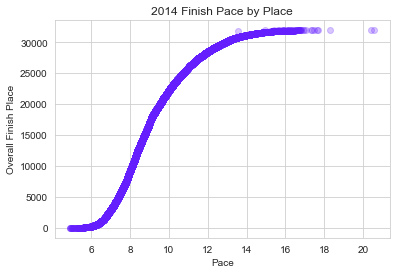

In [35]:
plt.scatter(x = results['pace'], y = results['overall'], alpha=.25)
plt.title('2014 Finish Pace by Place') 
plt.xlabel('Pace')
plt.ylabel('Overall Finish Place');

In [36]:
results = results.drop(results[results['bib'].str.contains('W')].index)

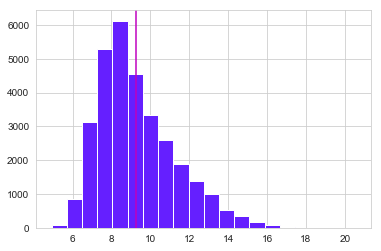

In [37]:
# View distribution for the pace
plt.hist(results.pace, bins=20)

# add a line for the average pace
plt.axvline(x=results.pace.mean(), color='m')
plt.show()

In [38]:
results.pace.describe()

count    31385.000000
mean         9.287511
std          1.984657
min          4.920000
25%          7.850000
50%          8.870000
75%         10.430000
max         20.570000
Name: pace, dtype: float64

In [39]:
results['pace-bracket'] = results['pace'].round()

results['pace-bracket'].value_counts()

8.0     7623
9.0     6390
7.0     4445
10.0    4325
11.0    3095
12.0    2002
13.0    1367
6.0      926
14.0     666
15.0     345
16.0     133
5.0       44
17.0      19
18.0       3
21.0       1
20.0       1
Name: pace-bracket, dtype: int64

In [40]:
results = results.drop(results[results['pace-bracket']>=17].index)

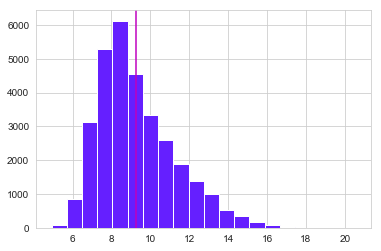

In [40]:
plt.hist(results.pace, bins=20)

# add a line for the average pace
plt.axvline(x=results.pace.mean(), color='m')
plt.show()

___

#### Top Divisions
Pull out the runners who finished in the top 300 of their division to see if more variance among the data surfaces. I tried looking up to see if I could find what data separated each runner into a division but was unable to find conclusive information.

In [41]:
top_divisions = results.loc[results['division']<350]

top_divisions.describe()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,country-code,region-code,sub-region-code,gender_code,age-bracket_code,pace-bracket
count,4790.000000,4797.000000,4777.000000,4797.000000,4797.000000,4797.000000,4791.000000,4797.000000,4797.000000,4789.000000,4792.000000,4787.000000,4792.000000,4794.000000,4797.000000,4797.000000,4797.000000,4797.000000,4797.000000,4797.000000
mean,47.679985,166.466959,121.265970,50.884094,214.735495,5051.988326,175.328435,10454.417553,8.198257,147.955149,23.762056,101.892361,96.555902,202.566479,727.490515,26.594330,32.936210,0.540338,3.538253,8.207838
std,8.324958,101.974637,22.744421,12.209438,46.111452,4599.665129,36.625436,8847.784483,1.758437,29.818331,4.018788,19.085661,17.998012,43.116818,249.577394,30.607079,56.145647,0.498422,1.261827,1.779422
min,30.480000,1.000000,76.000000,21.000000,128.620000,1.000000,106.620000,1.000000,4.920000,91.170000,15.150000,64.350000,61.080000,121.820000,32.000000,2.000000,15.000000,0.000000,-1.000000,5.000000
25%,41.780000,77.000000,105.070000,43.000000,182.320000,1183.000000,149.440000,2742.000000,6.970000,127.050000,20.930000,88.430000,83.850000,172.000000,840.000000,19.000000,21.000000,0.000000,3.000000,7.000000
50%,46.800000,161.000000,118.370000,51.000000,207.400000,3328.000000,169.720000,8494.000000,7.920000,143.720000,23.350000,99.520000,94.325000,195.870000,840.000000,19.000000,21.000000,1.000000,4.000000,8.000000
75%,52.727500,255.000000,133.620000,60.000000,235.480000,8570.000000,192.750000,16855.000000,8.980000,162.650000,26.222500,112.115000,106.235000,222.095000,840.000000,19.000000,21.000000,1.000000,4.000000,9.000000
max,97.400000,349.000000,250.580000,81.000000,457.550000,17571.000000,380.580000,31925.000000,17.470000,316.720000,55.000000,213.070000,201.930000,436.570000,862.000000,150.000000,419.000000,1.000000,6.000000,17.000000


In [42]:
top_divisions['gender'].value_counts()

M    2592
F    2205
Name: gender, dtype: int64

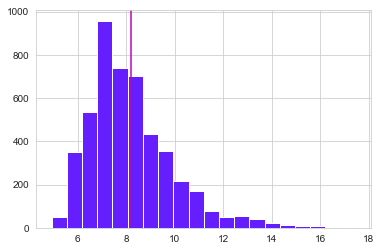

In [43]:
plt.hist(top_divisions['pace'], bins=20)
plt.axvline(x=top_divisions['pace'].mean(), color='m')
plt.show()

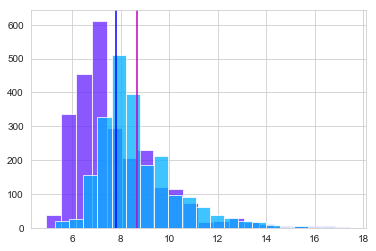

In [44]:
plt.hist(top_divisions['pace'].loc[top_divisions['gender']=='M'], bins=20, alpha=.75)
plt.hist(top_divisions['pace'].loc[top_divisions['gender']=='F'], bins=20, alpha=.75)
plt.axvline(x=top_divisions['pace'].loc[top_divisions['gender']=='M'].mean(), color='blue')
plt.axvline(x=top_divisions['pace'].loc[top_divisions['gender']=='F'].mean(), color='m')
plt.show()

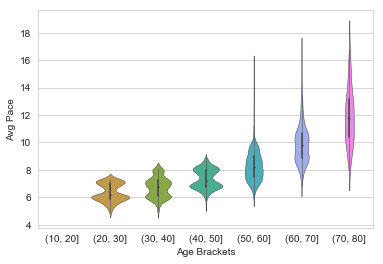

In [45]:
sns.violinplot(x='age-bracket', y='pace', data=top_divisions, linewidth=.5)
plt.xlabel('Age Brackets')
plt.ylabel('Avg Pace')
plt.show()

In [46]:
top_divisions['age-bracket'].value_counts()

(40, 50]    1412
(50, 60]    1353
(60, 70]     994
(30, 40]     464
(20, 30]     395
(70, 80]     173
(10, 20]       0
Name: age-bracket, dtype: int64

#### Plotting out Each Time
It's funny when you put each result down onto a graph, the lines of the age divisions begin to take a bit more shape. As the runners get farther up in age, the farther away they get from being top in their division. It also seems like the divisions are broken up by 5 years between ages 40 and 60, then below 40 might all be in one division. It is clear that the fastest runners are under 40. With being close to 30 correlating with speed.

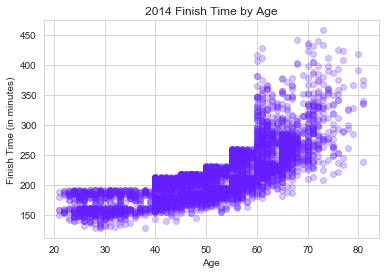

In [47]:
plt.scatter(x = top_divisions['age'], y = top_divisions['official'], alpha=.25)
plt.title('2014 Finish Time by Age') 
plt.xlabel('Age')
plt.ylabel('Finish Time (in minutes)');

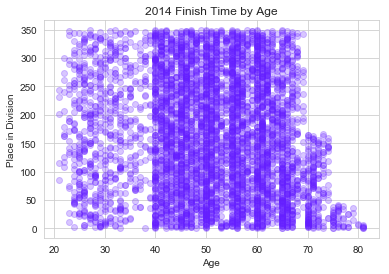

In [48]:
plt.scatter(x=top_divisions['age'], y=top_divisions['division'], alpha=.25)
plt.title('2014 Finish Time by Age') 
plt.xlabel('Age')
plt.ylabel('Place in Division')
plt.show()

----

## Modeling

In [49]:
results._get_numeric_data().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31385 entries, 0 to 31384
Data columns (total 20 columns):
10k                 31336 non-null float64
division            31385 non-null int64
25k                 31171 non-null float64
age                 31385 non-null int64
official            31385 non-null float64
genderdiv           31385 non-null int64
35k                 31352 non-null float64
overall             31385 non-null int64
pace                31385 non-null float64
30k                 31346 non-null float64
5k                  31333 non-null float64
half                31314 non-null float64
20k                 31334 non-null float64
40k                 31347 non-null float64
country-code        31385 non-null int64
region-code         31385 non-null float64
sub-region-code     31385 non-null float64
gender_code         31385 non-null int8
age-bracket_code    31385 non-null int8
pace-bracket        31385 non-null float64
dtypes: float64(13), int64(5), int8(2)
memory u

In [50]:
top_divisions.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', '35k', 'overall', 'pace', 'state', '30k', '5k', 'half',
       '20k', 'country', 'city', '40k', 'country-code', 'region', 'sub-region',
       'region-code', 'sub-region-code', 'gender_code', 'age-bracket',
       'age-bracket_code', 'pace-bracket'],
      dtype='object')

In [176]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# Make sure the number of rows divides evenly into four samples.
#rows = df.shape[0] - df.shape[0] % 4
#resu = df.iloc[:rows, :]

top_divisions = top_divisions.dropna()

top_num = top_divisions._get_numeric_data()

# Break into a set of features and a variable for the known outcome.
X = top_divisions[['overall','5k','10k','20k','25k','half','35k','40k','official','pace','pace-bracket','gender_code', 'age']]
y = top_divisions['age-bracket']

# Normalize
X_norm = normalize(X)

# Two PCA Features
X_pca = PCA(3).fit_transform(X_norm)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

from sklearn.model_selection import train_test_split

#Divide into training and test sets.
# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.5)

### K Means

In [177]:
from sklearn.cluster import KMeans

# Calculate predicted values.
km = KMeans(n_clusters=6).fit(X_norm)
y_test_pred = km.predict(X_norm)

# Check the solution against the data.
print('\nComparing k-means clusters against the training set data:')
print(pd.crosstab(y, y_test_pred))


Comparing k-means clusters against the training set data:
col_0           0   1   2    3    4   5
age-bracket                            
(20, 30]       31  71  71   16  120  86
(30, 40]      114  57  35   43  139  74
(40, 50]      690  15   6  166  493  37
(50, 60]     1140   2   0   24  171  10
(60, 70]      972   0   0    0    8   0
(70, 80]      166   0   0    0    0   0


In [178]:
from sklearn import metrics
n_clusters = (2,3,4,6,10,20,30)
for n in n_clusters:
    print("Number of estimated clusters: {}".format(n))
    model = KMeans(n_clusters=n).fit(X_norm)
    labels = model.labels_
    print('Silhouette Score:',metrics.silhouette_score(X_norm, labels, metric='euclidean'))

Number of estimated clusters: 2
Silhouette Score: 0.8749471378961619
Number of estimated clusters: 3
Silhouette Score: 0.8441007482025135
Number of estimated clusters: 4
Silhouette Score: 0.7321294824395762
Number of estimated clusters: 6
Silhouette Score: 0.6893855744667523
Number of estimated clusters: 10
Silhouette Score: 0.6726154973818802
Number of estimated clusters: 20
Silhouette Score: 0.5865386006694067
Number of estimated clusters: 30
Silhouette Score: 0.5565591748832988


Two clusters comes out with the highest score but I feel like 3 would give us more useful information and it's score is only a little bit less than the 2 clusters. Let's move ahead with 3 and if it doesn't work, move back to two clusters.

In [180]:
from sklearn.cluster import KMeans

# Calculate predicted values.
km = KMeans(n_clusters=3).fit(X_norm)
y_test_pred = km.predict(X_norm)

# Check the solution against the data.
print('\nComparing k-means clusters against the training set data:')
print(pd.crosstab(y, y_test_pred))


Comparing k-means clusters against the training set data:
col_0           0    1    2
age-bracket                
(20, 30]      165  120  110
(30, 40]      284   70  108
(40, 50]     1304   14   89
(50, 60]     1331    2   14
(60, 70]      980    0    0
(70, 80]      166    0    0


In [181]:
print('ARI for  Training set data: ')
print(metrics.adjusted_rand_score(y,  y_test_pred))

ARI for  Training set data: 
0.06838208649766404


In [182]:
top_divisions.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', '35k', 'overall', 'pace', 'state', '30k', '5k', 'half',
       '20k', 'country', 'city', '40k', 'country-code', 'region', 'sub-region',
       'region-code', 'sub-region-code', 'gender_code', 'age-bracket',
       'age-bracket_code', 'pace-bracket'],
      dtype='object')

In [183]:
top_divisions['km_label'] = km.labels_

top_divisions.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,...,country-code,region,sub-region,region-code,sub-region-code,gender_code,age-bracket,age-bracket_code,pace-bracket,km_label
0,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,116.37,...,404,Africa,Sub-Saharan Africa,2.0,202.0,0,"(30, 40]",2,5.0,1
1,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,116.37,...,404,Africa,Sub-Saharan Africa,2.0,202.0,0,"(20, 30]",1,5.0,1
2,32.58,"Cherop, Sharon",8,82.45,F,30,143.00,F6,8,116.92,...,404,Africa,Sub-Saharan Africa,2.0,202.0,0,"(20, 30]",1,5.0,1
3,30.52,"Chebet, Wilson",2,76.97,M,28,128.80,7,2,107.47,...,404,Africa,Sub-Saharan Africa,2.0,202.0,1,"(20, 30]",1,5.0,1
4,32.58,"Kilel, Caroline",17,85.55,F,33,152.07,F7,17,124.22,...,404,Africa,Sub-Saharan Africa,2.0,202.0,0,"(30, 40]",2,6.0,1


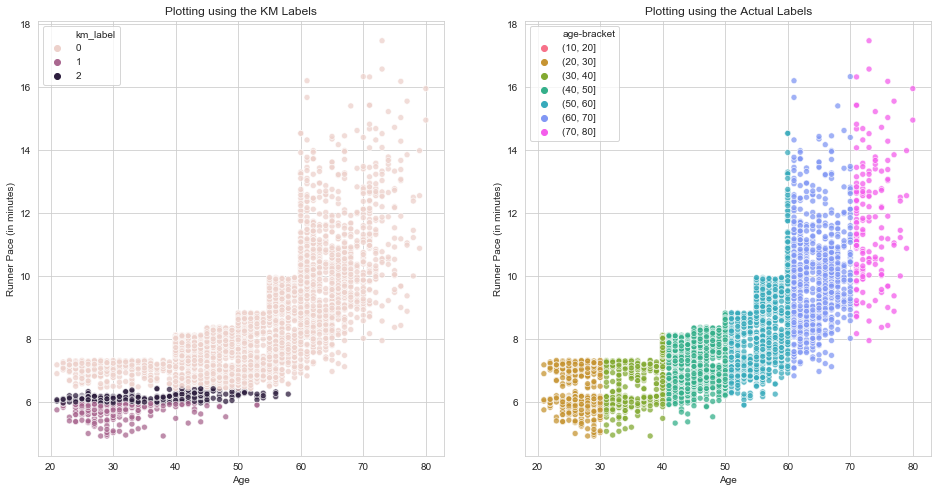

In [185]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(x="age", y='pace', hue='km_label', data=top_divisions, alpha=.75)
plt.title('Plotting using the KM Labels') 
plt.xlabel('Age')
plt.ylabel('Runner Pace (in minutes)');

plt.subplot(1,2,2)
sns.scatterplot(x="age", y='pace', hue='age-bracket', data=top_divisions, alpha=.75, )
plt.title('Plotting using the Actual Labels') 
plt.xlabel('Age')
plt.ylabel('Runner Pace (in minutes)');

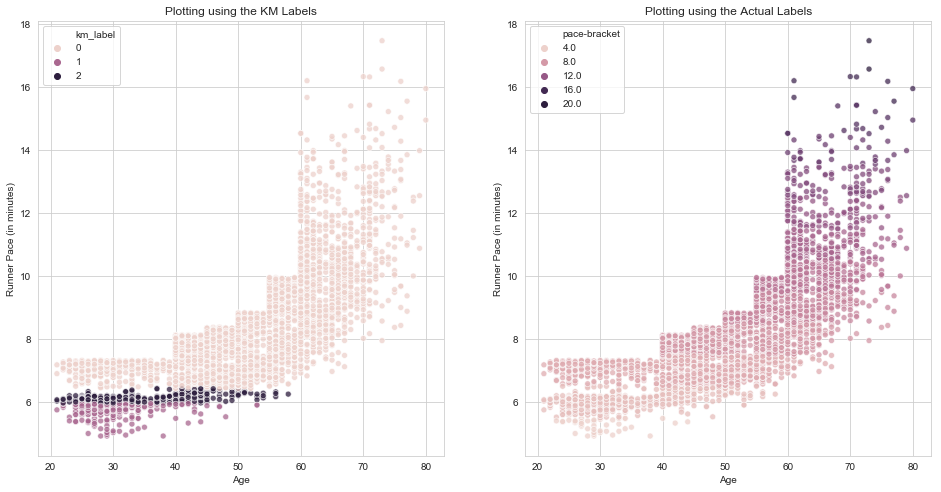

In [186]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(x="age", y='pace', hue='km_label', data=top_divisions, alpha=.75)
plt.title('Plotting using the KM Labels') 
plt.xlabel('Age')
plt.ylabel('Runner Pace (in minutes)');

plt.subplot(1,2,2)
sns.scatterplot(x="age", y='pace', hue='pace-bracket', data=top_divisions, alpha=.75, )
plt.title('Plotting using the Actual Labels') 
plt.xlabel('Age')
plt.ylabel('Runner Pace (in minutes)');

### Conclusion
So while originally I had wanted to predict the age bracket of runners, it seems like the model is better at classifying if a runner is fast or not. Specifically if a runner is faster than a 6 minute pace or not. While not what we wanted originally, also could find some use in a real world environment.

____

### Other tests and models 
Everything below here are other experiments I did that didn't have an ultimate effect on the conclusion

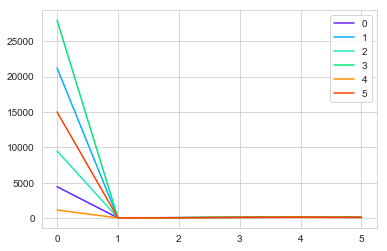

In [61]:
for i in range(6):
    plt.plot([X_train[X_train.km_label==i][_].mean() for _ in X_train.columns[:6]], label=i)
plt.legend()
plt.show()

### K Means with 2 Features
Going to reduce the dimensionality here to just two features. Essentially splitting the outcome to if a runner is over 40 years old or not, or that is what we will look for in the crosstab.

In [180]:
# Break into a set of features and a variable for the known outcome.
X = top_divisions[['overall','5k','10k','20k','25k','half','35k','40k','official','pace','pace-bracket','gender_code']]
y = top_divisions['age-bracket']

# Normalize
X_norm = normalize(X)

# Two PCA Features
X_pca = PCA(2).fit_transform(X_norm)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

from sklearn.model_selection import train_test_split

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.5)

In [181]:
# Calculate predicted values.
km = KMeans(n_clusters=2).fit(X_train)
y_test_pred = km.predict(X_test)

# Check the solution against the data.
print('\nComparing k-means clusters against the training set data:')
print(pd.crosstab(y_test, y_test_pred))


Comparing k-means clusters against the training set data:
col_0          0    1
age-bracket          
(20, 30]      67  104
(30, 40]     155   86
(40, 50]     688   24
(50, 60]     656    4
(60, 70]     518    0
(70, 80]      76    0


In [184]:
labels = km.labels_
print('Silhouette Score:',metrics.silhouette_score(X_train, labels, metric='euclidean'))

Silhouette Score: 0.8755217426858563


In [191]:
# the actual breakdown of ages in the dataset
y_test.value_counts()

(40, 50]    712
(50, 60]    660
(60, 70]    518
(30, 40]    241
(20, 30]    171
(70, 80]     76
(10, 20]      0
Name: age-bracket, dtype: int64

The score ends up being a nice number but when looking at the crosstab we see that most of the points have been labeled in one cluster. When we look at the actual splits for it, we do see that most of the runners in this sample are over 40, so it may not be all that abnormal to see the vast amount of runners be put into one of the clusters and not the other. It mislabeled only 28 total of the over 40 runners but missed quite a bit of runners who were in the 30-40 range. I would bet a lot of that is because of a lack of discernable difference between a mid to late 30s runner and a mid to early 40s runner.

___

In [175]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=6, affinity='nearest_neighbors',
                           assign_labels='kmeans')

#Predicted clusters.
train_predict=sc.fit_predict(X_train)

# Check the solution against the data.
print('\nComparing Spectral clusters against the training set data:')
print(pd.crosstab(y_train, train_predict))

/usr/local/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"



Comparing Spectral clusters against the training set data:
col_0          0    1    2   3   4   5
age-bracket                           
(20, 30]      21    0   75  33  29  48
(30, 40]      78    4   47  40  28  40
(40, 50]     365  146   12  62  84  11
(50, 60]     155  197  177  90  39   2
(60, 70]      24  118  363   6   3   0
(70, 80]       0    6   74   0   0   0


In [176]:
print('ARI for  Training set data: ')
print(metrics.adjusted_rand_score(y_train,  train_predict))

ARI for  Training set data: 
0.15455525582826893


In [178]:
labels = sc.labels_
print('Silhouette Score:',metrics.silhouette_score(X_train, labels))

Silhouette Score: -0.11746640300904536


### Mini Batch K Means

In [192]:
from sklearn.cluster import MiniBatchKMeans

# Each batch will be made up of 200 data points.
mini = MiniBatchKMeans(
    init='random',
    n_clusters=6,
    batch_size=100)
mini.fit(X_train)
y_train_pred = mini.predict(X_train)

# Check the solution against the data.
print('\nComparing k-means clusters against the training set data:')
print(pd.crosstab(y_train, y_train_pred))


Comparing k-means clusters against the training set data:
col_0          0    1   2   3   4    5
age-bracket                           
(20, 30]       0   88  13  77  46    0
(30, 40]      36   81  27  55  22    0
(40, 50]     304  245  92  20   5   29
(50, 60]     252  123  16   4   0  292
(60, 70]      47    6   0   0   0  409
(70, 80]       2    0   0   0   0   86


In [193]:
from sklearn import metrics
n_clusters = (2,4,6,10,20,30)
for n in n_clusters:
    print("Number of estimated clusters: {}".format(n))
    model = MiniBatchKMeans(init='random', n_clusters=n, batch_size=600).fit(X_train)
    labels = model.labels_
    print('Silhouette Score:',metrics.silhouette_score(X_train, labels, metric='euclidean'))

Number of estimated clusters: 2
Silhouette Score: 0.8738801489452014
Number of estimated clusters: 4
Silhouette Score: 0.6544000796611708
Number of estimated clusters: 6
Silhouette Score: 0.47638953216878177
Number of estimated clusters: 10
Silhouette Score: 0.4120854487442055
Number of estimated clusters: 20
Silhouette Score: 0.5268762157161113
Number of estimated clusters: 30
Silhouette Score: 0.4920933244964914


In [194]:
print('ARI for test set: ')
print(metrics.adjusted_rand_score(y_train,  y_train_pred))

ARI for test set: 
0.20333507765893172


In [196]:
X_train = pd.DataFrame(X_train)
X_train['mini_label'] = mini.labels_
X_train.groupby('mini_label').agg(['count','mean','std'])

0                         1                    
           count      mean       std count      mean       std
mini_label                                                    
0            641 -0.105857  0.009573   641  0.011968  0.005436
1            543 -0.037290  0.032123   543 -0.023329  0.014856
2            148  0.151360  0.092961   148 -0.086874  0.019250
3            156  0.620682  0.138262   156 -0.083852  0.038597
4             73  1.068934  0.096907    73  0.154956  0.091424
5            816 -0.125446  0.003128   816  0.023453  0.001887

## Mean Shift

In [67]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
print("bandwidth: {}".format(bandwidth))

model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
model.fit(X_train)

labels = model.labels_
cluster_centers = model.cluster_centers_
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
print('Silhouette Score:',metrics.silhouette_score(X_train, labels, metric='euclidean'))

bandwidth: 0.12587297356021457
Number of estimated clusters: 6
0.5257772122267376


In [68]:
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

Comparing the assigned categories to the ones in the data:
col_0      0    1    2  3   4  5
gender                          
F       6876   11    0  4  78  5
M       7896  146  502  0   0  0


In [69]:
# Adjusted Rand Score
print('ARI for test set: ')
metrics.adjusted_rand_score(y_train, labels)

ARI for test set: 


-0.007715067666135266

### Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering

# We know we're looking for two clusters.
n_clusters=2

start_time = time.clock()
# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
train_predict=sc.fit_predict(X_train)



print('Runtime for Spectral Cluster: '+'%s seconds'% (time.clock() - start_time))

print('\nComparing the assigned categories to the ones in the Training set data:')
print(pd.crosstab(y_train,train_predict))

This was taking forever to run, so skipping for now.

### Affinnity Propagaton

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation(damping=.75, affinity='euclidean').fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

start_time = time.clock()
#Predicted clusters.
predict=af.fit_predict(X_train)

print('Runtime for Affinity propagation: '+'%s seconds'% (time.clock() - start_time))

print('Estimated number of clusters: {}'.format(n_clusters_))

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

Very very random and doesn't tell us much at all

In [91]:
from sklearn.metrics import pairwise_distances

print(metrics.silhouette_score(X_train, labels, metric='euclidean'))

0.3818095410380991


In [90]:
print('ARI for  Training set data: ')
print(metrics.adjusted_rand_score(y_train,  predict))

ARI for  Training set data: 
0.023421073207129443
